In [711]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import classification_report

# Problem

Anda adalah seorang dokter di sebuah klinik yang sering menangani pasien dengan risiko penyakit jantung. Anda tahu bahwa deteksi dini risiko penyakit jantung sangat penting untuk mencegah kondisi yang lebih serius di kemudian hari. Anda memiliki data kesehatan dari sejumlah pasien yang telah dikumpulkan selama beberapa tahun.

Anda ingin mengetahui apakah ada hubungan antara faktor-faktor kesehatan tertentu, seperti usia, kebiasaan merokok, tekanan darah, dan tingkat kolesterol, dengan risiko seorang pasien terkena penyakit jantung dalam 10 tahun mendatang. Tujuan Anda adalah membangun model prediktif yang dapat membantu Anda mengidentifikasi pasien yang berisiko tinggi, sehingga Anda bisa memberikan peringatan dini dan saran kesehatan yang tepat.

Dengan menggunakan dataset yang Anda miliki, Anda akan membangun model Logistic Regression untuk memprediksi risiko penyakit jantung 10 tahun ke depan. Model ini akan memprediksi apakah seorang pasien akan mengidap penyakit jantung atau tidak (1 = ya, 0 = tidak), berdasarkan berbagai fitur kesehatan yang Anda miliki.

# Import

In [555]:
df = pd.read_csv("C:/Users/Owen/Downloads/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [557]:
df.dropna(axis=0,inplace=True)

In [559]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(df)
heart_df_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [561]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.1174
Time:                        21:44:32   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3222      0.715    -11.632      0.000      -9.725      -6.920
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

# EDA

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [566]:
df.describe(include='number')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [568]:
numerical = [angka for angka in df.columns if df[angka].dtypes != 'O']
df[numerical].isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

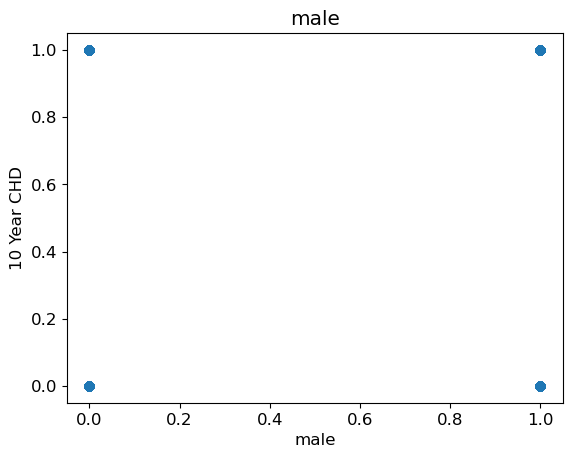

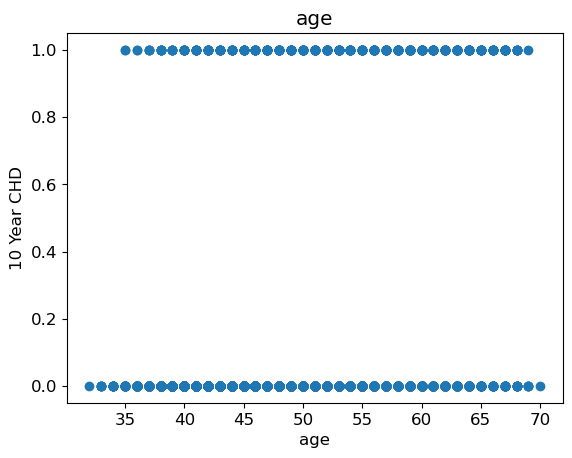

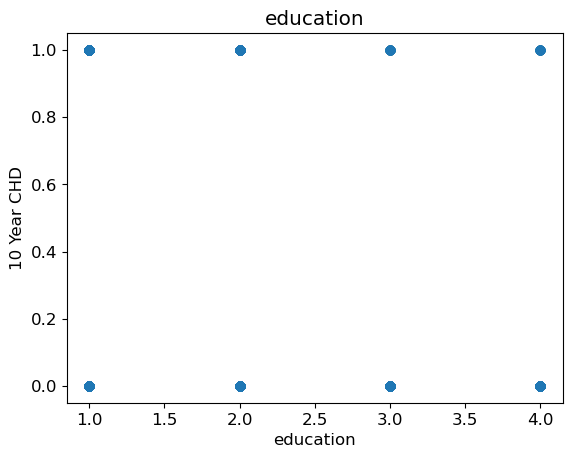

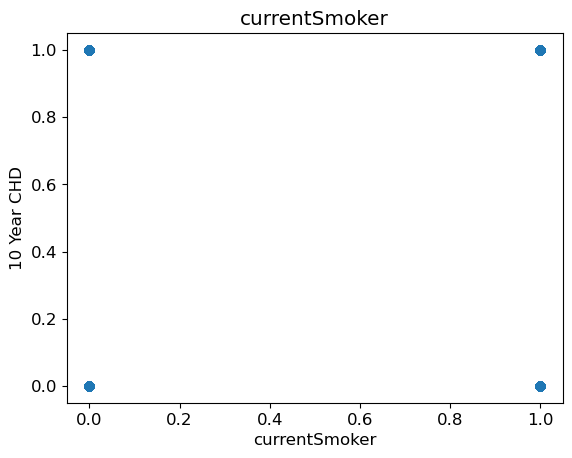

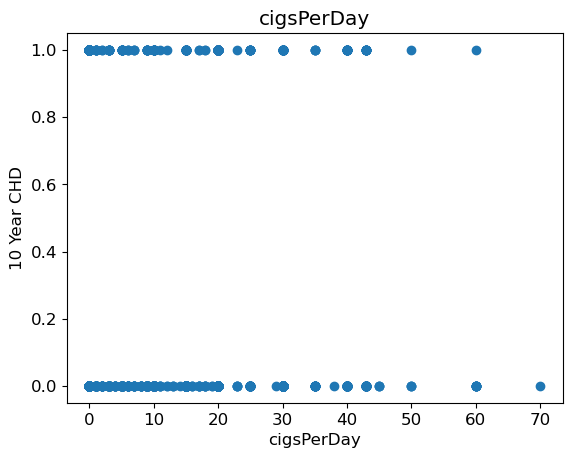

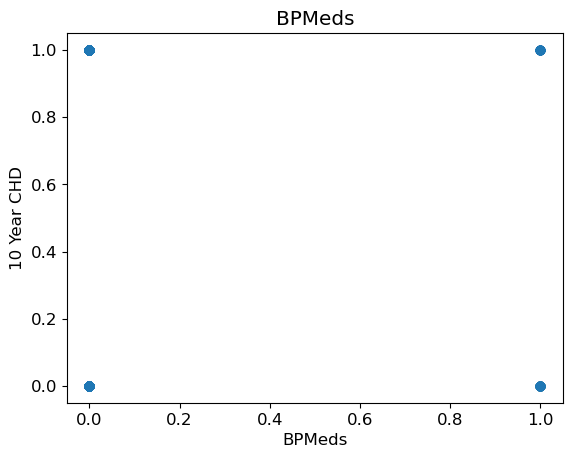

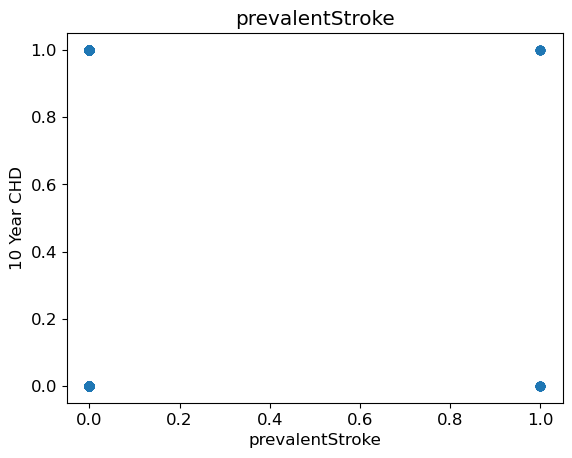

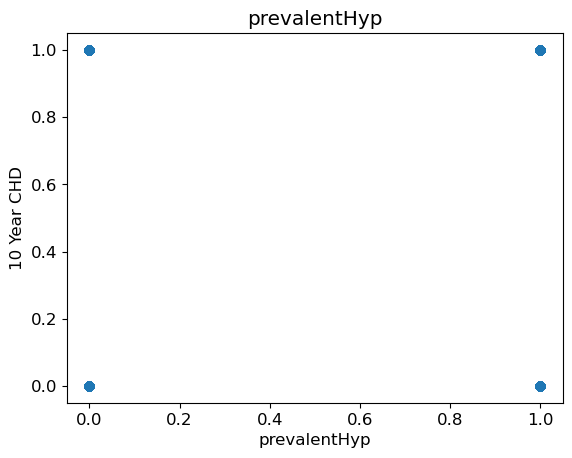

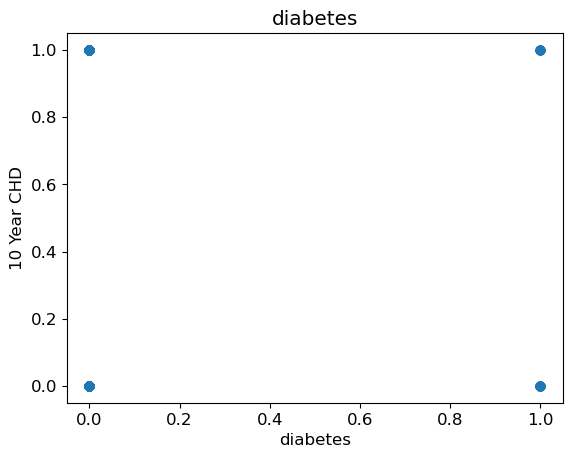

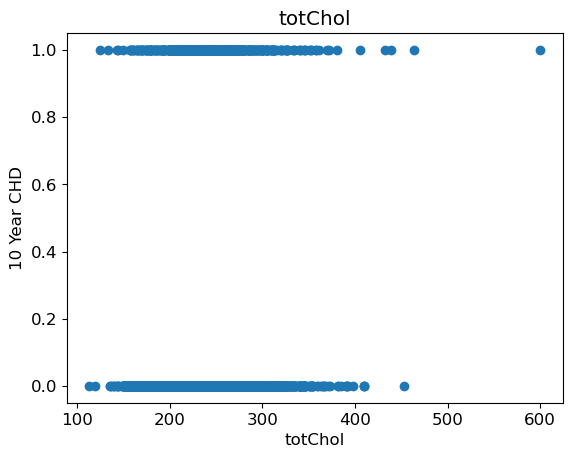

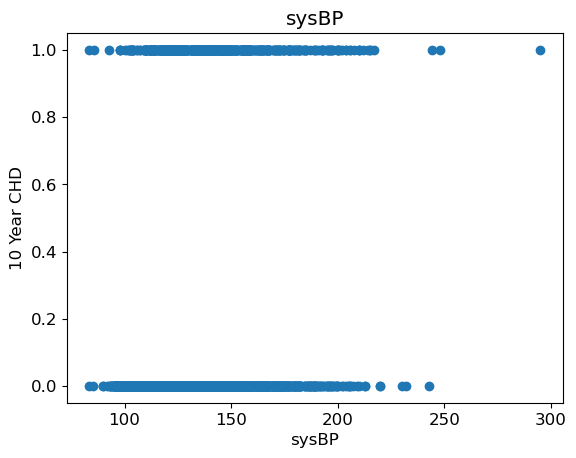

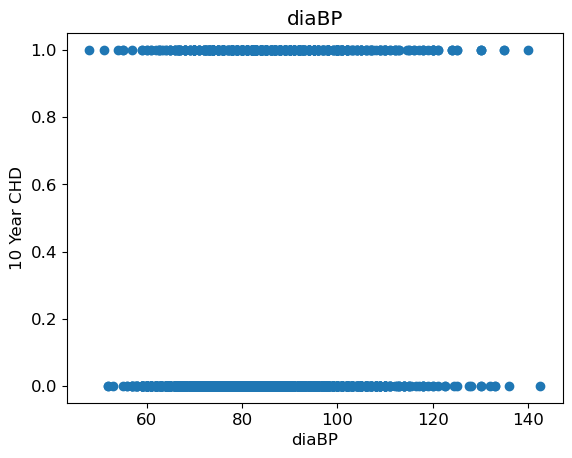

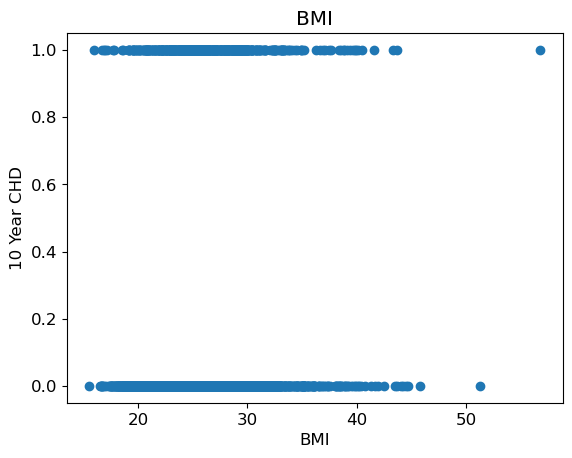

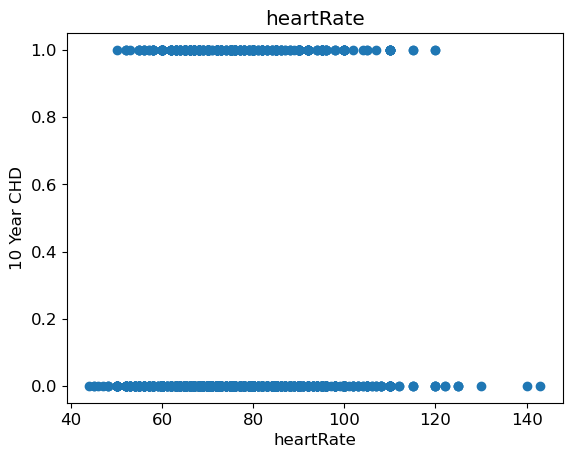

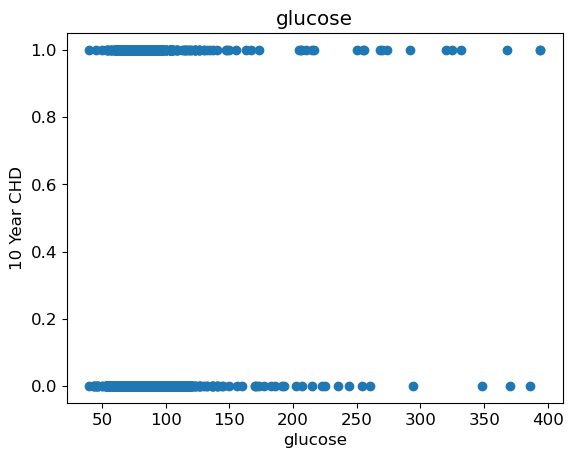

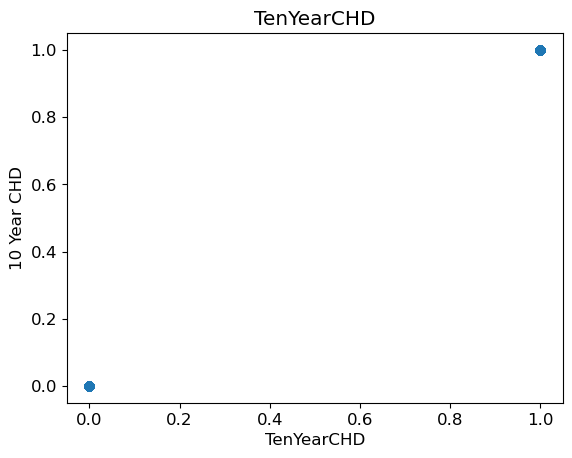

In [570]:
for col in numerical :
    plt.scatter(df[col], df['TenYearCHD'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('10 Year CHD')
    plt.show()

In [571]:
df[numerical].describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Text(0, 0.5, 'glucose')

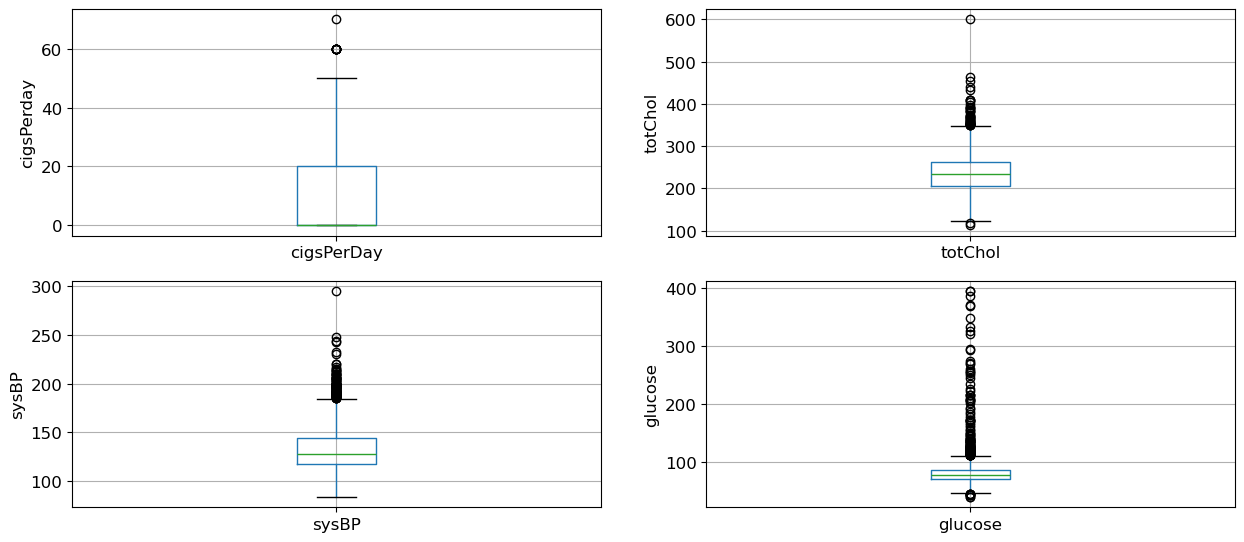

In [573]:
plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = df.boxplot(column='cigsPerDay')
fig.set_title('')
fig.set_ylabel('cigsPerday')


plt.subplot(3, 2, 2)
fig = df.boxplot(column='totChol')
fig.set_title('')
fig.set_ylabel('totChol')

plt.subplot(3, 2, 3)
fig = df.boxplot(column='sysBP')
fig.set_title('')
fig.set_ylabel('sysBP')

plt.subplot(3,2,4)
fig = df.boxplot('glucose')
fig.set_title('')
fig.set_ylabel('glucose')

There are a lot outliers right? so lets make a distribution data by using histogram

### Jadi Pada data terlihat bahwa ini merupakan data skewed positive karena mayoritas data berada disebelah kiri

Mari buat sebuah batasan pada kolom yg berisi outlier

In [579]:
IQR = df.cigsPerDay.quantile(0.75) - df.cigsPerDay.quantile(0.25)
Batasan_Bawah_cigsPerDay = df.cigsPerDay.quantile(0.25) - (IQR * 3)
Batasan_Atas_cigsPerDay = df.cigsPerDay.quantile(0.75) + (IQR * 3)
print('Batas Bawah = <',Batasan_Bawah ,'Batas Atas = >',Batasan_Atas)

Batas Bawah = < 23.0 Batas Atas = > 135.0


In [581]:
IQR = df.totChol.quantile(0.75) - df.totChol.quantile(0.25)
Batasan_Bawah_totChol = df.totChol.quantile(0.25) - (IQR * 3)
Batasan_Atas_totChol = df.totChol.quantile(0.75) + (IQR * 3)
print('Batas Bawah = <',Batasan_Bawah ,'Batas Atas = >',Batasan_Atas)

Batas Bawah = < 23.0 Batas Atas = > 135.0


In [583]:
IQR = df.sysBP.quantile(0.75) - df.sysBP.quantile(0.25)
Batasan_Bawah_sysBP = df.sysBP.quantile(0.25) - (IQR * 3)
Batasan_Atas_sysBP = df.sysBP.quantile(0.75) + (IQR * 3)
print('Batas Bawah = <',Batasan_Bawah ,'Batas Atas = >',Batasan_Atas)

Batas Bawah = < 23.0 Batas Atas = > 135.0


In [585]:
IQR = df.glucose.quantile(0.75) - df.glucose.quantile(0.25)
Batasan_Bawah_glucose = df.glucose.quantile(0.25) - (IQR * 3)
Batasan_Atas_glucose = df.glucose.quantile(0.75) + (IQR * 3)
print('Batas Bawah = <',Batasan_Bawah ,'Batas Atas = >',Batasan_Atas)

Batas Bawah = < 23.0 Batas Atas = > 135.0


In [587]:
df = df[(df['cigsPerDay'] >= Batasan_Bawah_cigsPerDay) & (df['cigsPerDay'] <= Batasan_Atas_cigsPerDay)]
df = df[(df['totChol'] >= Batasan_Bawah_totChol) & (df['totChol'] <= Batasan_Atas_totChol)]
df = df[(df['sysBP'] >= Batasan_Bawah_sysBP) & (df['sysBP'] <= Batasan_Atas_sysBP)]
df = df[(df['glucose'] >= Batasan_Bawah_glucose) & (df['glucose'] <= Batasan_Atas_glucose)]

# Splitting Data

In [590]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [592]:
new_features=df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
Feature=new_features.iloc[:,:-1]
Target=new_features.iloc[:,-1]

In [594]:
Feature.shape, Target.shape

((3583, 6), (3583,))

In [596]:
X_train,X_test,y_train,y_test = train_test_split(Feature, Target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2866, 6), (717, 6), (2866,), (717,))

# Feature Engineering

In [599]:
Numerical = [var for var in X_train.columns if X_train[var].dtypes != 'O']
for df1 in [X_train,X_test] :
    for col in Numerical:
        a = X_train[col].median()
        df1[col].fillna(a, inplace=True)

C:\Users\Owen\AppData\Local\Temp\ipykernel_10972\4140546536.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(a, inplace=True)


In [601]:
X_train.isnull().sum()

age           0
male          0
cigsPerDay    0
totChol       0
sysBP         0
glucose       0
dtype: int64

Mari kita hilangkan Outlier dengan menggunakan batas2 tadi

In [408]:
def Max_value(df3, kolom, batasan) :
    return np.where(df3[kolom] > batasan,batasan, df3[kolom])

for df3 in [X_train, X_test] :
    df3['cigsPerDay'] = Max_value(df3, 'cigsPerDay',80)
    df3['totChol'] = Max_value(df3, 'totChol', 434)
    df3['sysBP'] = Max_value(df3, 'sysBP', 225)
    df3['glucose'] = Max_value(df3, 'glucose', 135)

X_train.describe()

,age,male,cigsPerDay,totChol,sysBP,glucose
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,49.544118,0.443912,8.888167,236.938098,132.487004,80.793434
std,8.569359,0.496929,11.814834,43.961222,22.096540,15.018169
min,32.000000,0.000000,0.000000,113.000000,83.500000,40.000000
25%,42.000000,0.000000,0.000000,206.000000,117.000000,71.000000
50%,49.000000,0.000000,0.000000,234.000000,128.000000,78.000000
75%,57.000000,1.000000,20.000000,263.000000,144.000000,87.000000
max,70.000000,1.000000,70.000000,434.000000,225.000000,135.000000


In [603]:
lima = ['cigsPerDay', 'totChol', 'sysBP', 'glucose']
X_train[lima].max()

cigsPerDay     60.0
totChol       432.0
sysBP         220.0
glucose       135.0
dtype: float64

# Data Scalling

In [606]:
X_train.describe()

,age,male,cigsPerDay,totChol,sysBP,glucose
count,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000
mean,49.453943,0.434752,9.098046,236.804257,131.837753,79.433357
std,8.545177,0.495811,11.950676,42.994814,21.164312,12.836953
min,32.000000,0.000000,0.000000,113.000000,83.500000,40.000000
25%,42.000000,0.000000,0.000000,206.250000,117.000000,71.000000
50%,49.000000,0.000000,0.000000,234.000000,128.000000,77.000000
75%,56.000000,1.000000,20.000000,264.000000,143.000000,86.000000
max,69.000000,1.000000,60.000000,432.000000,220.000000,135.000000


In [608]:
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [610]:
X_train.shape

(2866, 6)

In [612]:
X_train.describe()

,age,male,cigsPerDay,totChol,sysBP,glucose
count,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000
mean,0.471728,0.434752,0.151634,0.388101,0.354123,0.415088
std,0.230951,0.495811,0.199178,0.134780,0.155050,0.135126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270270,0.000000,0.000000,0.292320,0.245421,0.326316
50%,0.459459,0.000000,0.000000,0.379310,0.326007,0.389474
75%,0.648649,1.000000,0.333333,0.473354,0.435897,0.484211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Training

In [615]:
Model = LogisticRegression(solver='liblinear', random_state=0)
Model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [617]:
y_pred_test = Model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [619]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8647


In [621]:
y_pred_train = Model.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [623]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8514


In [625]:
print('Training set score: {:.4f}'.format(Model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(Model.score(X_test, y_test)))


Training set score: 0.8514
Test set score: 0.8647


In [627]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [629]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8545
Test set score: 0.8689


In [643]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [645]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))


Training set score: 0.8514
Test set score: 0.8633


In [647]:
y_test.value_counts()

TenYearCHD
0    619
1     98
Name: count, dtype: int64

In [649]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [651]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[616   3]
 [ 94   4]]

True Positives(TP) =  616

True Negatives(TN) =  4

False Positives(FP) =  3

False Negatives(FN) =  94


<Axes: >

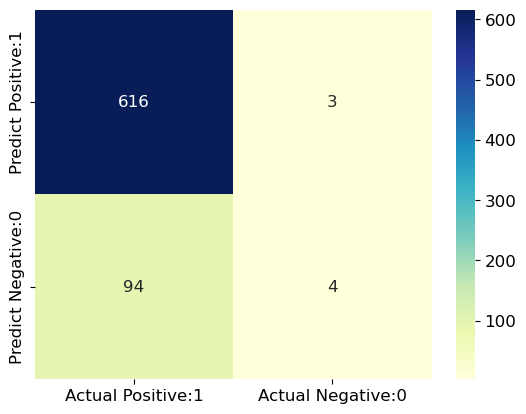

In [653]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [709]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       619
           1       0.57      0.04      0.08        98

    accuracy                           0.86       717
   macro avg       0.72      0.52      0.50       717
weighted avg       0.83      0.86      0.81       717



In [657]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [659]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8647


In [661]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1353


In [665]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9952


In [667]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8676


In [669]:
F1score = 2 * (precision * recall) / (precision + recall)
format(F1score)

'0.927012791572611'

In [671]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8676


In [673]:
print("Training set class distribution:", y_train.value_counts())
print("Test set class distribution:", y_test.value_counts())


Training set class distribution: TenYearCHD
0    2440
1     426
Name: count, dtype: int64
Test set class distribution: TenYearCHD
0    619
1     98
Name: count, dtype: int64


In [675]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4286


In [677]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5714


In [679]:
y_pred_prob = Model.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.70462329, 0.29537671],
       [0.89550517, 0.10449483],
       [0.96195242, 0.03804758],
       [0.89535436, 0.10464564],
       [0.92746934, 0.07253066],
       [0.69397247, 0.30602753],
       [0.93274737, 0.06725263],
       [0.71816566, 0.28183434],
       [0.7293908 , 0.2706092 ],
       [0.81275913, 0.18724087]])

In [681]:
y_pred_prob=Model.predict_proba(X_test)[:,:]

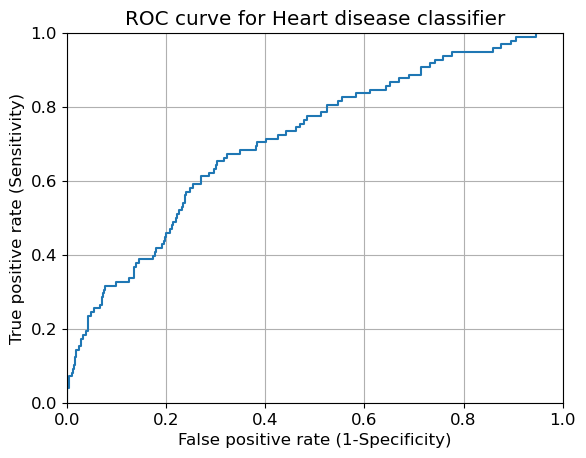

In [683]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [685]:
y_pred_prob_yes=Model.predict_proba(X_test)

In [687]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.711252513929643

In [689]:
Model.predict_proba(X_test)[0:10, 1]

array([0.29537671, 0.10449483, 0.03804758, 0.10464564, 0.07253066,
       0.30602753, 0.06725263, 0.28183434, 0.2706092 , 0.18724087])

In [691]:
y_pred1 = Model.predict_proba(X_test)[:, 1]


In [693]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df


,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.704623,0.295377
1,0.895505,0.104495
2,0.961952,0.038048
3,0.895354,0.104646
4,0.927469,0.072531
...,...,...
712,0.932607,0.067393
713,0.912292,0.087708
714,0.924155,0.075845
715,0.961816,0.038184


Text(0, 0.5, 'Frequency')

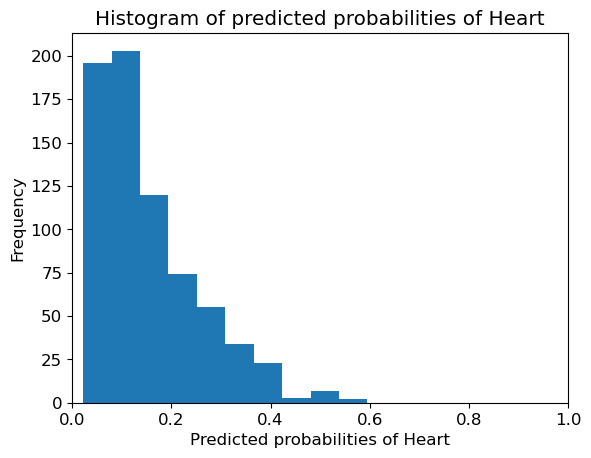

In [695]:
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Heart')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Heart')
plt.ylabel('Frequency')

In [696]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.85017422 0.85514834 0.84991274 0.85165794 0.85165794]


In [699]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.8517


In [701]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = Model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [702]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8545


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [705]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8689
